In [92]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [93]:
wine = pd.read_csv('WineQT.csv')

In [94]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


1.1 Exploratory analysis of the dataset

In [95]:
wine.shape

(1143, 13)

In [96]:
#Dataset Information
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [97]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [98]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [99]:
#No missing values!

In [100]:
#Dataset statistics
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [101]:
wine['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [102]:
#For each features number of unique value
for col in wine.columns.values:
    print('Number of unique values of {} : {}'.format(col, wine[col].nunique()))


Number of unique values of fixed acidity : 91
Number of unique values of volatile acidity : 135
Number of unique values of citric acid : 77
Number of unique values of residual sugar : 80
Number of unique values of chlorides : 131
Number of unique values of free sulfur dioxide : 53
Number of unique values of total sulfur dioxide : 138
Number of unique values of density : 388
Number of unique values of pH : 87
Number of unique values of sulphates : 89
Number of unique values of alcohol : 61
Number of unique values of quality : 6
Number of unique values of Id : 1143


In [103]:
#Maximum unique value of the feature is density
#Minimum unique value of the feature is quality

In [104]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [105]:
print(wine[wine['quality'] ==8].mean())

fixed acidity             8.806250
volatile acidity          0.410000
citric acid               0.432500
residual sugar            2.643750
chlorides                 0.070187
free sulfur dioxide      11.062500
total sulfur dioxide     29.375000
density                   0.995553
pH                        3.240625
sulphates                 0.766250
alcohol                  11.937500
quality                   8.000000
Id                      797.875000
dtype: float64


In [106]:
#Create pivot table
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id']
wine_pivot_table = wine.pivot_table(columns, ['quality'], aggfunc = 'median')
wine_pivot_table

,Id,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,1384.0,9.825,0.0800,0.050,0.997565,7.45,5.5,3.355,2.1,0.56,15.0,0.8175
4,703.0,10.000,0.0780,0.070,0.996640,7.60,12.0,3.380,2.1,0.56,32.0,0.6750
5,717.0,9.700,0.0810,0.230,0.996920,7.80,14.0,3.300,2.2,0.58,46.0,0.5900
6,894.5,10.500,0.0785,0.245,0.996520,7.90,14.0,3.320,2.2,0.64,35.0,0.5000
7,942.0,11.600,0.0730,0.400,0.995680,8.70,12.0,3.270,2.3,0.74,28.0,0.3600
8,543.0,11.750,0.0715,0.455,0.995580,8.85,6.5,3.225,2.1,0.73,18.0,0.3550


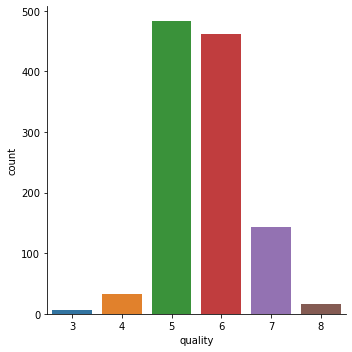

In [107]:
#Data Distribution
sns.catplot(x= 'quality' , data=wine, kind = 'count')

ValueError: num must be 1 <= num <= 12, not 13

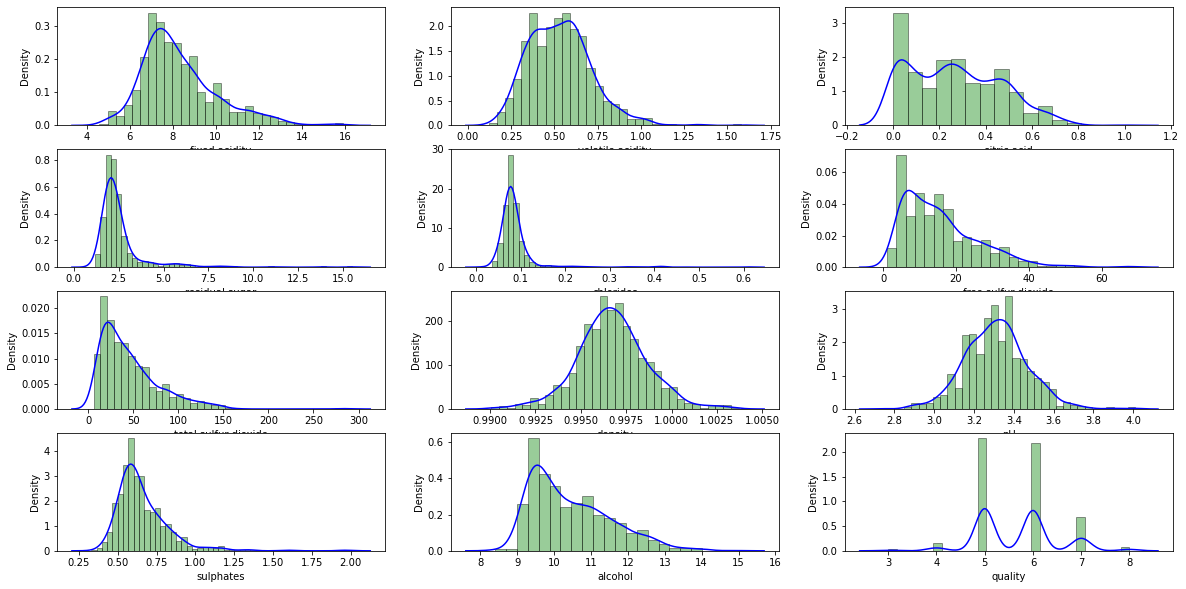

In [108]:
#Plotting the distribution for each variable
figure = plt.figure(figsize = [20,10])
columns = wine.columns
count = 1
for col in columns:
    plt.subplot(4,3,count)
    sns.distplot(wine[col],hist_kws=dict(edgecolor = 'k', linewidth =1, color = 'green'), color = 'blue')
    count+=1
plt.tight_layout()
plt.show()

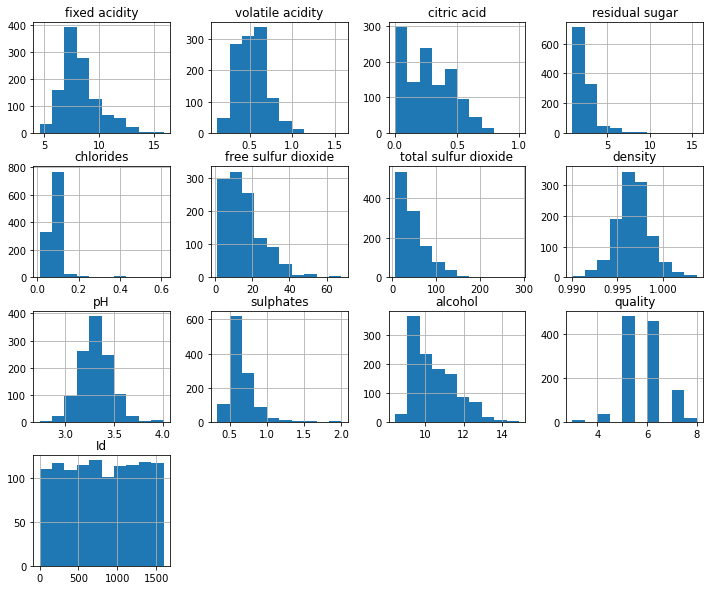

In [109]:
#Histograms
wine.hist(bins=10, figsize = (12,10))
plt.show()

In [110]:
#Wine quality score for 5, 6 are more frequent compared to others

In [111]:
#Correlation matrix to understnd the inter-dependency of parameters over each other
correlation_matrix = wine.corr()
correlation_matrix['quality'].sort_values(ascending= False)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

<AxesSubplot:>

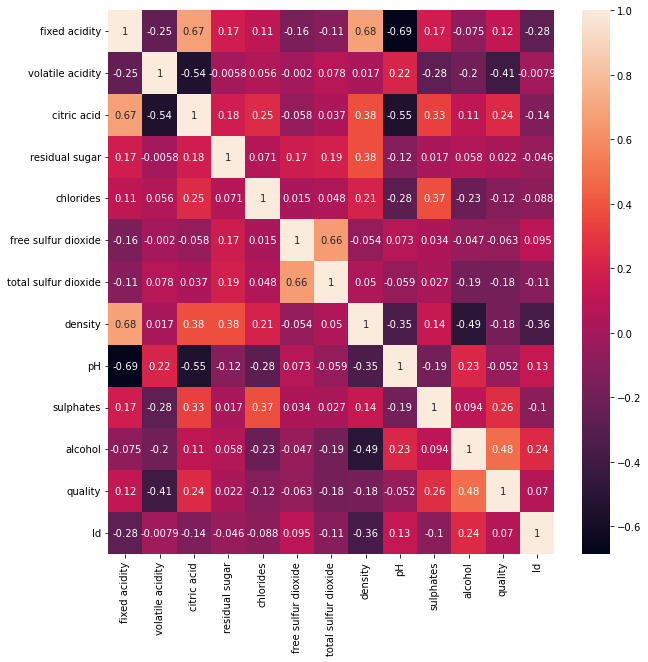

In [112]:
plt.figure(figsize = (10,10))
sns.heatmap(wine.corr(), color = 'k' , annot = True)

In [113]:
#From the correlation heat-map, it is apparent that the wine quality is positively correlated with alcohol and sulphates
# and negatively correlated with volatile acidity. Maybe because low level of acidity is favoured in quality testing 

1.2 Finding groups using k-means clustering

In [114]:
x = wine.drop('quality' , axis =1)
y=wine['quality']

In [117]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Id'],
      dtype='object')

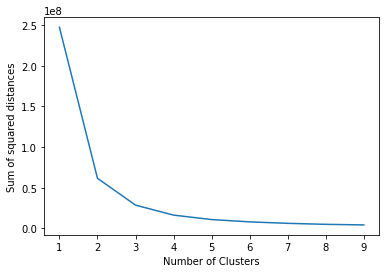

In [118]:
#Implementing Elbow Technique
wss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wss.append(kmeans.inertia_)
plt.plot(range(1,10), wss)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances')
plt.show()

In [119]:
for i in range(2,10):
    kmeans = KMeans(n_clusters = i, max_iter= 100)
    kmeans.fit(x)
    score= silhouette_score(wine, kmeans.labels_)
    print('For cluster: {}, the silhouette score is: {}'.format(i,score))

For cluster: 2, the silhouette score is: 0.6231692680970948
For cluster: 3, the silhouette score is: 0.5699053941359317
For cluster: 4, the silhouette score is: 0.5483129734260468
For cluster: 5, the silhouette score is: 0.5276979775158082
For cluster: 6, the silhouette score is: 0.5118165230595331
For cluster: 7, the silhouette score is: 0.49055433620280814
For cluster: 8, the silhouette score is: 0.48006384219430914
For cluster: 9, the silhouette score is: 0.46032901998295017


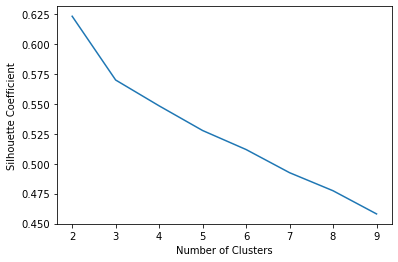

In [120]:
silhouette_coefficients = []
for i in range(2,10):
    kmeans= KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(x)
    score= silhouette_score(x, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [121]:
pca = PCA()
X=pca.fit_transform(x)

In [122]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)
unique_labels = np.unique(label)

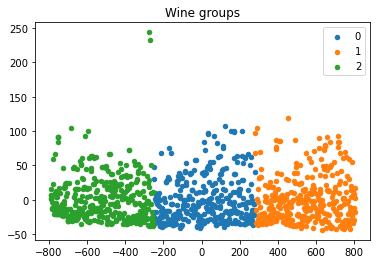

In [123]:
for i in unique_labels:
    plt.scatter(X[label == i, 0], X[label == i,1], label =i, s=20)

plt.legend()
plt.title('Wine groups')
plt.show()


1.3 Model Building

In [124]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Id'],
      dtype='object')

In [125]:
y.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [126]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2, random_state=55)

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score,recall_score, classification_report
from sklearn.metrics import f1_score, accuracy_score

In [133]:
xtrain, xtest, ytrain, ytest =train_test_split(x,y, test_size=0.2,random_state=55)

In [135]:
models = [RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression()]
scores = dict()

for m in models:
    m.fit(xtrain, ytrain)
    ypred = m.predict(xtest)
    print(f'model: {str(m)}')
    print(classification_report(ytest, ypred, zero_division=1))
    print('*'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       1.00      0.00      0.00         6
           5       0.70      0.80      0.75        91
           6       0.61      0.71      0.66        92
           7       0.67      0.36      0.47        33
           8       1.00      0.20      0.33         5

    accuracy                           0.66       229
   macro avg       0.83      0.35      0.37       229
weighted avg       0.68      0.66      0.64       229

****************************** 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         6
           5       0.52      0.65      0.58        91
           6       0.49      0.55      0.52        92
           7       0.11      0.03      0.05        33
           8       1.00      0.00    

For this specific dataset, I will go for Random Forest to build the model. There are several advantages of this model.
The model is more accurate compared to the most non-linear classifiers. It avoids overfitting taking average of all 
predictions and cancelling out the biases. Most importantly, the algorithm is robust as it utilizes several decision trees
to reach the result.
Again, random forest is like a black box and we have very little control over. The training time and space complexity can 
be considered as a drawback of this specific model.